In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_raw = pd.read_csv("data.csv")
df_raw.head()

,R_fighter,B_fighter,Referee,date,location,Winner,title_bout,weight_class,B_avg_KD,B_avg_opp_KD,...,R_win_by_Decision_Unanimous,R_win_by_KO/TKO,R_win_by_Submission,R_win_by_TKO_Doctor_Stoppage,R_Stance,R_Height_cms,R_Reach_cms,R_Weight_lbs,B_age,R_age
0,Adrian Yanez,Gustavo Lopez,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,0.000,0.0,...,0,1,0,0,Orthodox,170.18,177.80,135.0,31.0,27.0
1,Trevin Giles,Roman Dolidze,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,0.500,0.0,...,0,3,0,0,Orthodox,182.88,187.96,185.0,32.0,28.0
2,Tai Tuivasa,Harry Hunsucker,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,NaN,NaN,...,1,3,0,0,Southpaw,187.96,190.50,264.0,32.0,28.0
3,Cheyanne Buys,Montserrat Conejo,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,NaN,NaN,...,0,0,0,0,Switch,160.02,160.02,115.0,28.0,25.0
4,Marion Reneau,Macy Chiasson,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,0.125,0.0,...,1,2,2,0,Orthodox,167.64,172.72,135.0,29.0,43.0


In [14]:
# interested columns for EDA
columns = [
    "Referee",
    "date",
    "location",
    "Winner",
    "title_bout",
    "weight_class",
    "B_fighter",
    "B_avg_KD",
    "B_avg_SIG_STR_pct",
    "B_avg_TD_pct",
    "B_avg_SIG_STR_landed",
    "B_avg_TD_landed",
    "B_avg_HEAD_landed",
    "B_avg_LEG_landed",
    "B_avg_BODY_landed",
    "B_total_title_bouts",
    "B_current_win_streak",
    "B_avg_CTRL_time(seconds)",
    "B_wins",
    "B_losses",
    "R_fighter",
    "R_avg_KD",
    "R_avg_SIG_STR_pct",
    "R_avg_TD_pct",
    "R_avg_SIG_STR_landed",
    "R_avg_TD_landed",
    "R_avg_HEAD_landed",
    "R_avg_LEG_landed",
    "R_avg_BODY_landed",
    "R_total_title_bouts",
    "R_current_win_streak",
    "R_avg_CTRL_time(seconds)",
    "R_wins",
    "R_losses",
]

In [15]:
# Fiter out only the interested columns
new_df_raw = df_raw[columns]
new_df_raw.head()

,Referee,date,location,Winner,title_bout,weight_class,B_fighter,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,...,R_avg_SIG_STR_landed,R_avg_TD_landed,R_avg_HEAD_landed,R_avg_LEG_landed,R_avg_BODY_landed,R_total_title_bouts,R_current_win_streak,R_avg_CTRL_time(seconds),R_wins,R_losses
0,Chris Tognoni,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Bantamweight,Gustavo Lopez,0.000,0.420000,0.330,...,17.000000,0.000000,15.000000,0.000000,2.000000,0,1,5.000000,1,0
1,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Middleweight,Roman Dolidze,0.500,0.660000,0.300,...,43.156250,0.781250,38.062500,1.781250,3.312500,0,2,176.156250,4,2
2,Herb Dean,2021-03-20,"Las Vegas, Nevada, USA",Red,False,Heavyweight,Harry Hunsucker,NaN,NaN,NaN,...,30.375000,0.000000,16.781250,9.046875,4.546875,0,3,82.453125,4,3
3,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenStrawweight,Montserrat Conejo,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,NaN,0,0
4,Mark Smith,2021-03-20,"Las Vegas, Nevada, USA",Blue,False,WomenBantamweight,Macy Chiasson,0.125,0.535625,0.185,...,44.362305,1.261719,26.030273,4.862305,13.469727,0,2,141.285156,5,6


In [16]:
# Make a copy
df = new_df_raw.copy()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6012 entries, 0 to 6011
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Referee                   5980 non-null   object 
 1   date                      6012 non-null   object 
 2   location                  6012 non-null   object 
 3   Winner                    6012 non-null   object 
 4   title_bout                6012 non-null   bool   
 5   weight_class              6012 non-null   object 
 6   B_fighter                 6012 non-null   object 
 7   B_avg_KD                  4585 non-null   float64
 8   B_avg_SIG_STR_pct         4585 non-null   float64
 9   B_avg_TD_pct              4585 non-null   float64
 10  B_avg_SIG_STR_landed      4585 non-null   float64
 11  B_avg_TD_landed           4585 non-null   float64
 12  B_avg_HEAD_landed         4585 non-null   float64
 13  B_avg_LEG_landed          4585 non-null   float64
 14  B_avg_BO

In [18]:
df.describe()

,B_avg_KD,B_avg_SIG_STR_pct,B_avg_TD_pct,B_avg_SIG_STR_landed,B_avg_TD_landed,B_avg_HEAD_landed,B_avg_LEG_landed,B_avg_BODY_landed,B_total_title_bouts,B_current_win_streak,...,R_avg_SIG_STR_landed,R_avg_TD_landed,R_avg_HEAD_landed,R_avg_LEG_landed,R_avg_BODY_landed,R_total_title_bouts,R_current_win_streak,R_avg_CTRL_time(seconds),R_wins,R_losses
count,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,4585.000000,6012.000000,6012.000000,...,5300.000000,5300.000000,5300.000000,5300.000000,5300.000000,6012.000000,6012.000000,5300.000000,6012.000000,6012.000000
mean,0.247476,0.453310,0.292650,33.337168,1.109138,21.387261,5.268264,6.681643,0.277279,0.947272,...,34.808436,1.184075,22.344055,5.592977,6.871403,0.582169,1.314704,144.215233,3.756986,2.071357
std,0.378509,0.130458,0.273628,22.030474,1.328047,15.314792,5.496281,5.920334,1.125673,1.489959,...,22.568121,1.322230,15.582960,5.772675,5.988029,1.551233,1.729916,136.696848,3.861044,2.265830
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.376489,0.031250,17.000000,0.062500,10.500000,1.437500,2.375000,0.000000,0.000000,...,18.932042,0.187500,11.608887,1.500000,2.717140,0.000000,0.000000,38.280029,1.000000,0.000000
50%,0.015625,0.450000,0.250000,29.687500,0.750000,18.335938,3.625000,5.076477,0.000000,0.000000,...,30.500000,0.812500,19.015137,3.937378,5.430634,0.000000,1.000000,104.865234,3.000000,1.000000
75%,0.500000,0.527500,0.500000,45.500000,1.562500,28.815918,7.281631,9.296875,0.000000,1.000000,...,46.000000,1.734375,29.375000,7.947638,9.376709,1.000000,2.000000,211.136719,6.000000,3.000000
max,5.000000,1.000000,1.000000,186.000000,10.968750,138.000000,51.635986,64.000000,16.000000,16.000000,...,212.142956,11.000000,173.163765,62.351562,54.000000,16.000000,16.000000,996.749573,23.000000,17.000000


### Who has the longest win streak in UFC?

In [42]:
# concat red and blue fighter win streak
fighter_win_streak = {
    'fighters': pd.concat([df['R_fighter'], df['B_fighter']]),
    'win_streak': pd.concat([df['R_current_win_streak'], df['B_current_win_streak']])
}

# Turn dicts to data frame 
win_streak_df = pd.DataFrame(fighter_win_streak)

# get top 10 fighter with longest win steak
sorted_df = win_streak_df.sort_values(by=['win_streak'], ascending=False).drop_duplicates()[:50]
top_10_win_streak = sorted_df.drop_duplicates(subset=['fighters'])[0:10]
top_10_win_streak

,fighters,win_streak
2282,Anderson Silva,16
62,Kamaru Usman,12
204,Khabib Nurmagomedov,12
3879,Junior Dos Santos,9
2120,Chris Weidman,9
26,Israel Adesanya,9
4771,Jon Fitch,8
4543,Lyoto Machida,8
492,Yoel Romero,8
382,Alexander Volkanovski,8


In [45]:
import matplotlib
# config the graph
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9,5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

Text(0.5, 0, 'Win Streak')

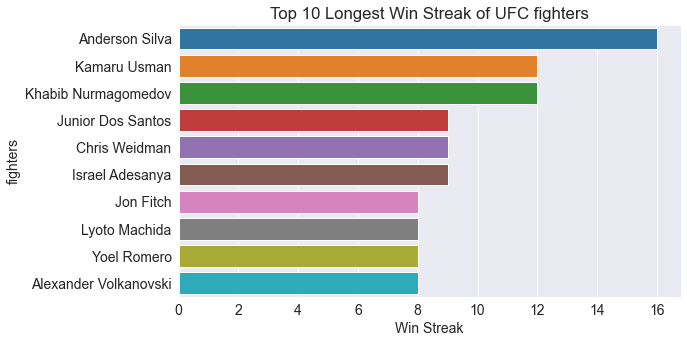

In [49]:
sns.barplot(y=top_10_win_streak['fighters'], x=top_10_win_streak['win_streak'])
plt.title("Top 10 Longest Win Streak of UFC fighters")
plt.xlabel("Win Streak")